# Shamir Secret Sharing

In this notebook we will study the properties of polynomials to perform secret sharing and defining the properties of sum and multiplication, the protocol we will learn is called Shamir secret sharing and was published by Adi Shamir in 1979, you can read the paper [here](http://users.cms.caltech.edu/~vidick/teaching/101_crypto/Shamir1979.pdf). At the same time will investigate the difference between Shamir secret sharing and additive secret sharing.

## Polynomials

We look at polynomials and their properties. First let's look at a simple polynomial say $$f(x)=3+x+2x^2-x^3$$

and plot it a graph. Also we plot a random sampling of the polynomial points.

<Figure size 432x288 with 0 Axes>

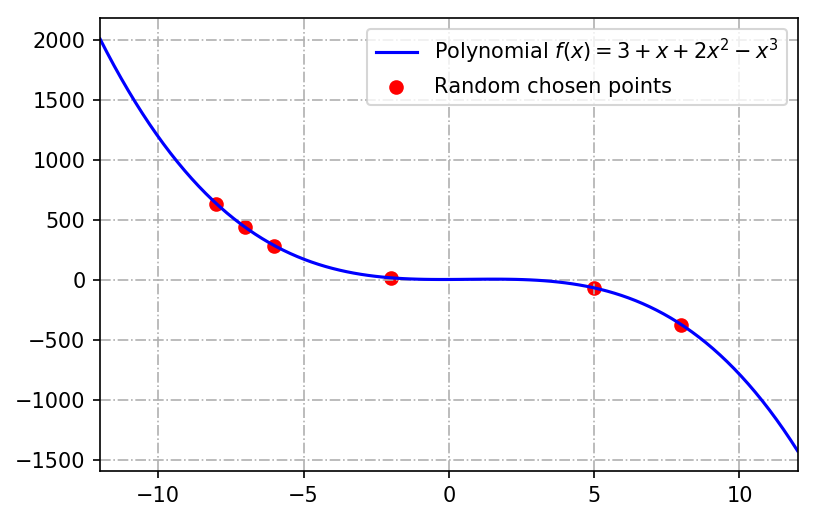

Random points are:
[(-6, 285), (8, -373), (-8, 635), (-2, 17), (-7, 437), (5, -67)]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange, seed

seed(1)

# Defining the polynomial
def poly3(x):
    return 3+1*x+2*x**2-x**3

# Generate 5 random points
points = []
while len(points)<6:
    x = randrange(-10, 10)
    points.append((x, poly3(x)))

# Plotting
plt.clf()
x = np.linspace(-12,12,100)
fig=plt.figure(dpi = 150)
ax = fig.add_subplot(1, 1, 1)

# plot the function
plt.plot(x,poly3(x), 'b', label="Polynomial $f(x)=3+x+2x^2-x^3$")
plt.scatter([a[0] for a in points], [a[1] for a in points], c='r', label="Random chosen points")

plt.legend()
plt.grid(linestyle="-.")
plt.xlim(-12, 12)
plt.show()

print(f"Random points are:\n{points}")

Can we reconstruct the exact full polynomial with few random sampled points? The answer is yes, we need as many as $t$ points, being $t$ larger than $n$ the degree of the polynomial. Imagine we want to fit a line, how many points do we need? just two, a parabola? we need three points and so on. This uniqueness of solution allows to define a sharing scheme over polinomials.

## Shamir

Think of the field (mathematically speaking) of all the polynomials whose coeficients are in the field $Z$ modulo p, for ideally a large prime. We can define a secret as the independent term of the polinomial, this is:
$$f(x)=s+a_1x+a_2x^2+...+a_nx^n$$

where $n$ is the degree and all the coefficients are randomly chosen values in $Z$ modulo p. Let me define a function to randomly saple a polinomial with a secret

In [17]:
from crypt import RandomPrime
from random import randrange

bits = 16
p = RandomPrime(bits, 40)

print(f"Chosen prime number p={p} of {bits} bits")

def RandomPolynomial(s, n, p):
    # s is the secret, n the degree of polynomial and p the prime number for the field
    coef = [s]
    while len(coef)<n+1:
        coef.append(randrange(1, p))
    return coef

secret = 10
degree = 5
coefficients = RandomPolynomial(secret, degree, p)

print(f"A random polynomial drawn from the coefficient field F_p:\n")
for i, coef in enumerate(coefficients):
    if i==0:
        print(f"secret = a{i} = {coef}")
    else:
        print(f"a{i} = {coef}")

Chosen prime number p=49123 of 16 bits
A random polynomial drawn from the coefficient field F_p:

secret = a0 = 10
a1 = 26039
a2 = 9599
a3 = 2316
a4 = 47110
a5 = 10501


Making the shares at this point is easy, we just have to draw as many random points as the number of parties we have. Let's make a function to evaluate the polynomial at certain points given their coefficients.

In [18]:
def PolyEvaluate(coef, x):
    # Horner's method to evaluate polynomial
    # coef is a list of the coefficients [a0, a1,..., an]
    n = len(coef)
    coef = coef[::-1]
    r = coef[0]   
    for i in range(1, n): 
        r = r*x + coef[i] 
    return r 

PolyEvaluate(coefficients, 2)

1198804